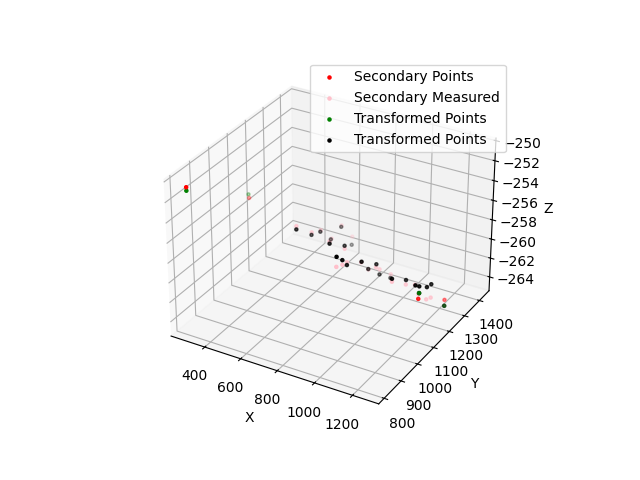

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget
# Primary and secondary coordinate systems
primary_points = np.array(
    [[  81.47215,  912.59351, -188.1876 ],
 [-221.96082,  947.8621 , -189.12784],
 [-139.45496, 1908.37505, -204.52583],
 [-308.08844, 1914.4505 , -206.3994 ]]
 )



secondary_points = np.array(
[[ 281.93664,  813.00075, -250.74397],
 [ 302.16366, 1120.89171, -256.10254],
 [1261.67549, 1083.8417 , -260.621  ],
 [1261.69426, 1254.48284, -263.4829 ]]
 )

to_transform = np.array(
[[-207.87512, 1215.38008, -194.28263],
 [-297.26761, 1218.22484, -195.03306],
 [-351.95246, 1219.07367, -194.80739],
 [-405.16202, 1231.01138, -195.79044],
 [-455.88826, 1245.34785, -194.63684],
 [-507.11798, 1260.9935 , -196.76062],
 [-200.32496, 1397.61538, -196.77651],
 [-289.09282, 1402.59325, -197.21549],
 [ -73.26635, 1540.97411, -198.64909],
 [-124.7113 , 1527.54575, -199.02501],
 [-175.3226 , 1509.43947, -199.54626],
 [-303.54526, 1517.28214, -200.32945],
 [-354.89916, 1536.33569, -201.13821],
 [-405.31879, 1555.45702, -201.75668],
 [-191.92911, 1571.85034, -199.60235],
 [-282.84564, 1576.22655, -200.10769],
 [-187.38123, 1733.17693, -202.23955],
 [-275.00872, 1738.19682, -202.63499],
 [-174.64673, 1862.91088, -203.5947 ],
 [-202.98186, 1861.15475, -203.76784],
 [-251.33852, 1864.22735, -204.00254],
 [-278.62449, 1866.19619, -203.78841],
 [-139.45496, 1908.37505, -204.52583],
 [-308.08844, 1914.4505 , -206.3994 ]]
)
meas_original = np.array(
[[ 569.10267, 1118.60291, -257.56468],
 [ 568.07368, 1208.08206, -259.54461],
 [ 566.47553, 1263.97261, -260.15084],
 [ 577.33322, 1317.96399, -261.80079],
 [ 587.16032, 1368.9404 , -261.11007],
 [ 600.6998 , 1421.43631, -263.01739],
 [ 751.15622, 1119.77043, -258.17963],
 [ 751.71234, 1209.26045, -260.28662],
 [ 900.09291,  999.59905, -258.09521],
 [ 885.45842, 1050.84937, -258.76169],
 [ 864.81409, 1100.31313, -259.38147],
 [ 866.04916, 1229.52439, -262.13418],
 [ 881.4349 , 1282.11724, -262.84812],
 [ 898.63512, 1334.52785, -264.10237],
 [ 924.15218, 1119.93294, -259.35642],
 [ 923.9594 , 1211.02285, -261.30933],
 [1086.34755, 1124.61499, -260.52356],
 [1086.72317, 1211.95643, -262.19209],
 [1214.72143, 1117.79702, -260.00975],
 [1211.80278, 1144.89108, -261.40697],
 [1212.38867, 1194.47976, -262.74099],
 [1213.88515, 1221.53628, -262.98586],
 [1261.67549, 1083.8417 , -260.621  ],
 [1261.69426, 1254.48284, -263.4829 ]]
)

def find_transformation_matrix(A, B):
    # Calculate centroids of both sets of points
    centroid_A = np.mean(A, axis=0)
    centroid_B = np.mean(B, axis=0)
    
    # Center the points
    AA = A - centroid_A
    BB = B - centroid_B

    # Compute the covariance matrix
    H = np.dot(AA.T, BB)

    # Perform SVD on the covariance matrix
    U, S, Vt = np.linalg.svd(H)
    R = np.dot(Vt.T, U.T)

    # Correct reflection issue if the determinant of R is negative
    if np.linalg.det(R) < 0:
        Vt[-1, :] *= -1
        R = np.dot(Vt.T, U.T)

    # Calculate the translation vector
    T = centroid_B - np.dot(R, centroid_A)

    return R, T

# Calculate rotation and translation
rotation_matrix, translation_vector = find_transformation_matrix(primary_points, secondary_points)

# Transform the primary points to align with the secondary points
transformed_points = np.dot(rotation_matrix, primary_points.T).T + translation_vector
transformed_extra = np.dot(rotation_matrix, to_transform.T).T + translation_vector
# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Original points in primary coordinate system
#ax.scatter(primary_points[:, 0], primary_points[:, 1], primary_points[:, 2], color='blue', label="Primary Points", s= 5)

# Original points in secondary coordinate system
ax.scatter(secondary_points[:, 0], secondary_points[:, 1], secondary_points[:, 2], color='red', label="Secondary Points", s= 5)
ax.scatter(meas_original[:, 0], meas_original[:, 1], meas_original[:, 2], color='pink', label="Secondary Measured", s= 5)

# Transformed primary points
ax.scatter(transformed_points[:, 0], transformed_points[:, 1], transformed_points[:, 2], color='green', label="Transformed Points", s= 5)
ax.scatter(transformed_extra[:, 0], transformed_extra[:, 1], transformed_extra[:, 2], color='black', label="Transformed Points", s= 5)

# Labels and legend
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend()
plt.show()


In [19]:
np.linalg.norm(meas_original-transformed_extra,axis=1)

array([0.96659365, 0.97165962, 0.73584514, 2.21185302, 0.53614925,
       0.93415459, 1.07936759, 0.86011808, 1.58348709, 0.87986029,
       0.97899179, 0.28104794, 1.31480114, 1.63042713, 2.0097429 ,
       2.21380917, 1.22453852, 1.55732205, 2.86886263, 2.84887092,
       3.09016817, 2.41947807, 3.09459615, 1.67929236])

In [20]:
np.linalg.norm(transformed_points- secondary_points, axis=1)

array([3.37994825, 1.19151714, 1.93997351, 3.43517067, 1.07936759,
       0.86011808, 3.09459615, 1.67929236])